In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### converting quality column to bad or good then label encoding

In [5]:
bins = (2,6.5,8) #so there would be 2 groups/bins, 2-6.5 and 6.5-8
labels = ['bad','good'] #their respective labels
df['quality'] = pd.cut(df['quality'],bins=bins,labels=labels)
df.quality.head(10)

0     bad
1     bad
2     bad
3     bad
4     bad
5     bad
6     bad
7    good
8    good
9     bad
Name: quality, dtype: category
Categories (2, object): [bad < good]

In [6]:
# now label encoding good and bad
le = LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])
df.quality.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: quality, dtype: int32

###### scaling data except quality column 

In [7]:
# using standard scalar to normalize the data
scaler = StandardScaler()
scaled_df = df.drop('quality', axis= 1)
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df),columns = scaled_df.columns)  #scaling df and getting df from it.
scaled_df['quality'] = df['quality']
df = scaled_df
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,0
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,0
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,0


###### Third standard deviation and z score(degree by which it differs from standard deviation) are almost similar and are the ways to detect outliers.

In [8]:
# thrid standard deviation to detect outliers
def third_std(col_name, df):
    upperL = df[col_name].mean() + (3*df[col_name].std())
    lowerL = df[col_name].mean() - (3*df[col_name].std())
    print(f"Upper bound: {upperL}, Lower bound: {lowerL}")
    return df[~((df[col_name] > upperL) | (df[col_name] < lowerL))]  #returns df without outliers

In [9]:
# z score to detect outliers
def z_score(col_name, df):
    col_outliers = []
    for i in df[col_name]:
        z_score = (i - df[col_name].mean()) / df[col_name].std()
        if(z_score > 3 or z_score < -3):
            col_outliers.append(i)
    return df[~(df[col_name].isin(col_outliers))] #returns df without outliers

###### plotting bar plots and box plots to get idea about outliers

In [10]:
def bar_box(col_name):
    sns.barplot(x = 'quality', y = col_name, data = df)
    plt.show()  #plt.show() helps to show multiple plots via running one cell.
    sns.boxplot(x= df[col_name])
    plt.show()
    print('-----------------------------------------------------------------')

Upper bound: 3.000938526536334, Lower bound: -3.0009385265363333


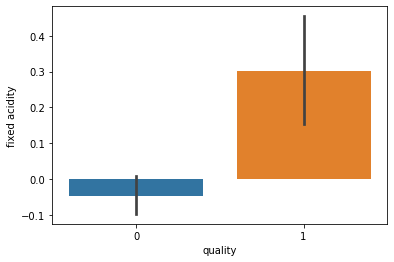

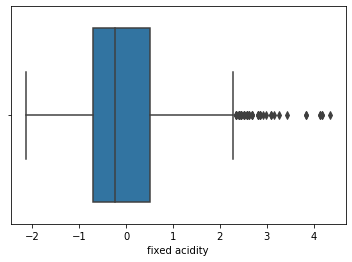

-----------------------------------------------------------------
Upper bound: 3.000938526536334, Lower bound: -3.000938526536334


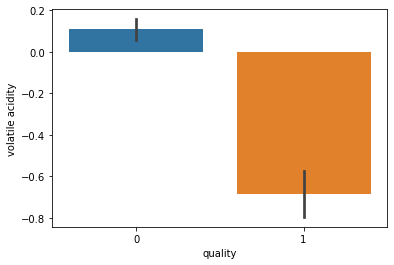

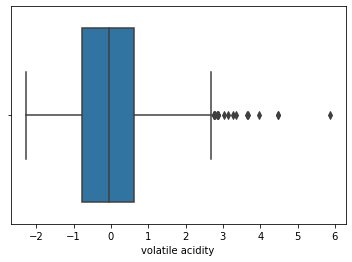

-----------------------------------------------------------------
Upper bound: 3.0009385265363338, Lower bound: -3.0009385265363338


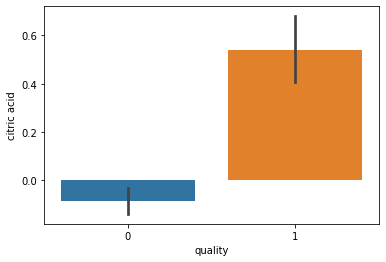

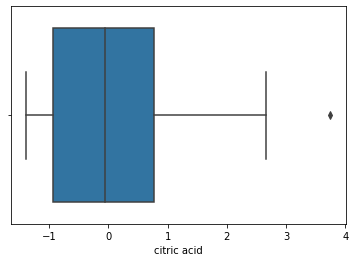

-----------------------------------------------------------------
Upper bound: 3.0009385265363338, Lower bound: -3.0009385265363338


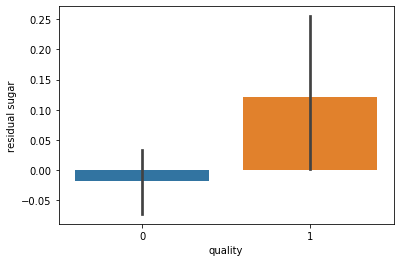

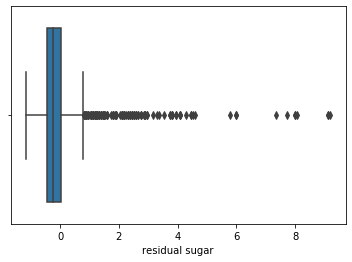

-----------------------------------------------------------------
Upper bound: 3.000938526536334, Lower bound: -3.0009385265363333


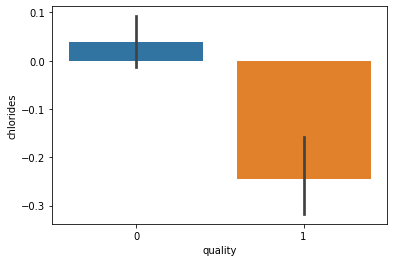

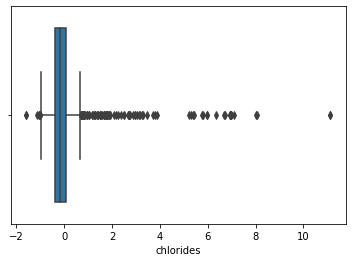

-----------------------------------------------------------------
Upper bound: 3.0009385265363338, Lower bound: -3.0009385265363338


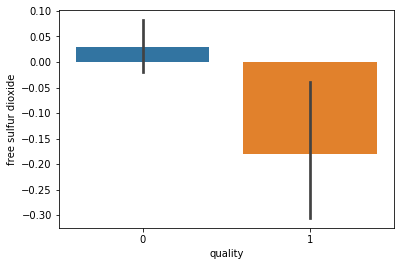

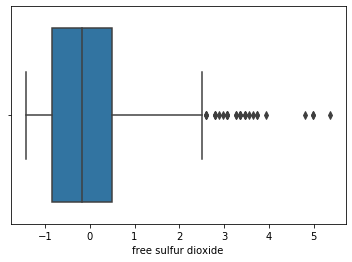

-----------------------------------------------------------------
Upper bound: 3.0009385265363338, Lower bound: -3.0009385265363338


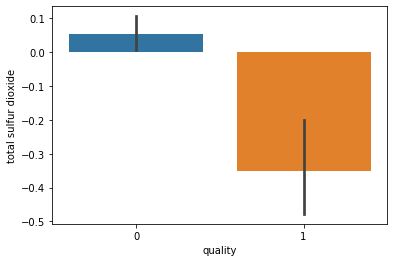

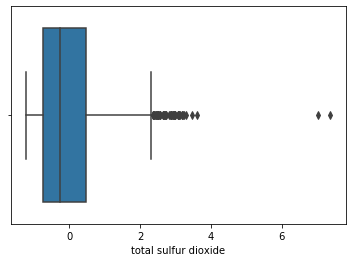

-----------------------------------------------------------------
Upper bound: 3.000938526536299, Lower bound: -3.0009385265363684


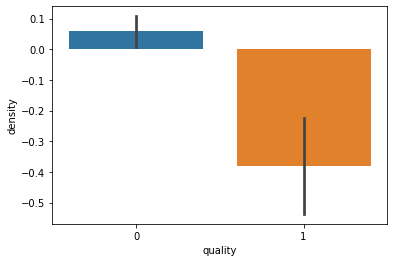

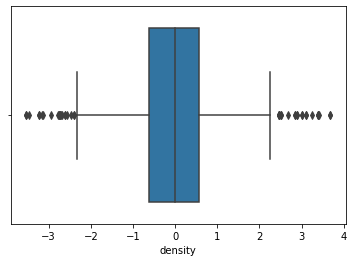

-----------------------------------------------------------------
Upper bound: 3.0009385265363364, Lower bound: -3.000938526536331


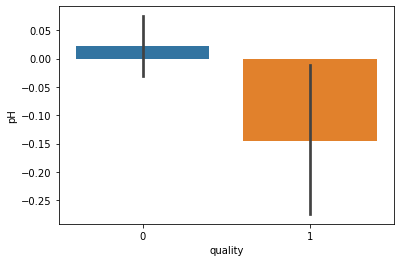

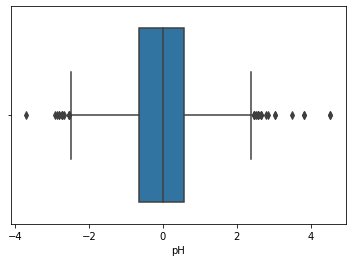

-----------------------------------------------------------------
Upper bound: 3.0009385265363346, Lower bound: -3.000938526536333


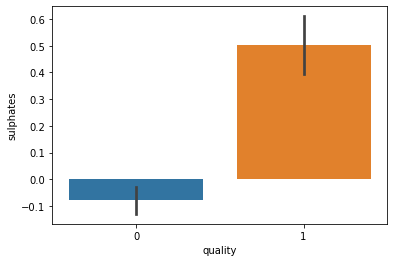

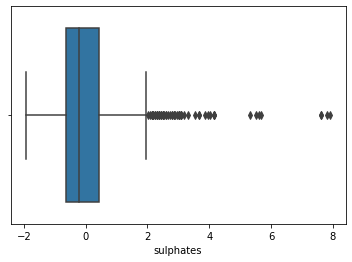

-----------------------------------------------------------------
Upper bound: 3.0009385265363338, Lower bound: -3.0009385265363338


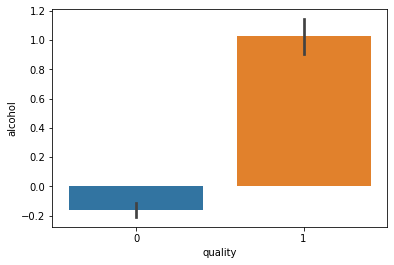

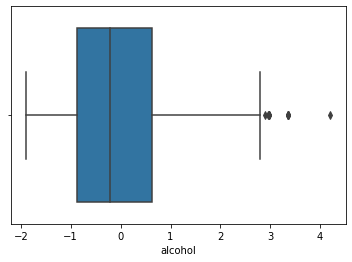

-----------------------------------------------------------------
Upper bound: 1.1634717418660465, Lower bound: -0.8920521045927507


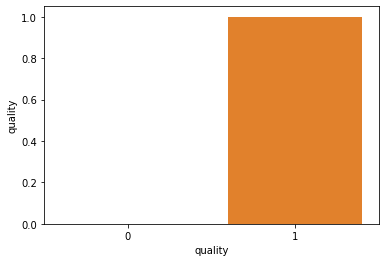

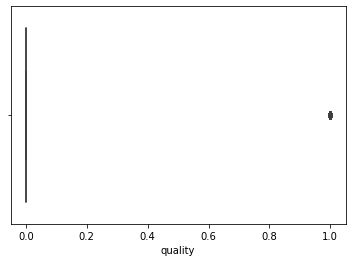

-----------------------------------------------------------------


In [11]:
for each_col in df.columns:
    third_std(each_col, df)
    bar_box(each_col)

###### Removing outliers

In [12]:
# removing outliers from each col except quality col which is our label.
for each_col in df.columns[:-1]: 
    df = z_score(each_col, df)
df #here df is without outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,0
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,0
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,0


###### Predicting stuff

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
X = df.drop(['quality'], axis= 1)
y = df['quality'].values.ravel()

In [15]:
def run_model(model, X, y):
    score_array = cross_val_score(model, X, y) #gives five fold score array by defualt like k folds
    avg_score = np.mean(score_array)
    print(avg_score)

In [16]:
run_model(LogisticRegression(), X, y)
run_model(svm.SVC(), X, y)
run_model(KNeighborsClassifier(), X, y)
run_model(RandomForestClassifier(), X, y)

0.8721181257766624
0.8735167271752637
0.8490363295241344
0.8672181477059526


###### Hyper parameter tuning, GridSearchCV

In [17]:
# nested dict for models and its various parameters we wanna test.
model_params = {
    'svm': {
        'model': svm.SVC(gamma= 'auto'),
        'params': {
            'C': [1, 5, 10, 20, 30, 40],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10, 20]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'k-nearest neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5, 15, 30]
        }
    }   
}

# Now applying GridSearchCV on each model to come up with best model and parameters
scores = []
for model_name, mp in model_params.items(): #'.items()' will return key and value pair
    #GridsSearchCV takes model, its parameters and no. of folds to made.
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
# And from that scores list which has a dict for each model we will create a df for better representation.
scores_df = pd.DataFrame(scores, columns = ['model','best_score','best_params'])
scores_df

,model,best_score,best_params
0,svm,0.872116,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.870018,{'n_estimators': 20}
2,logistic_regression,0.872118,{'C': 1}
3,k-nearest neighbors,0.867225,{'n_neighbors': 30}


###### knn is bit away from others, still evey model performed good!